![ICL](Images/imperiallogo.jpeg)

# Introduction to bayesian methods in ecology and evolution


## Wednesday: 07 - Bayesian computation

### Intended Learning Outcomes

At the end of this part you will be able to:
* describe the use of asymptotic methods,
* illustrate the utility of direct and indirect sampling methods,
* evaluate the feasibility of Markov Chain Monte Carlo sampling,
* implement simple indirect sampling methods.

The calculation of posterior distributions often involves the evaluation of complex high-dimensional integrals.
This is true when a conjugate prior is not available or appropriate.

Ways of addressing this issue are through
* asymptotic methods for approximating the posterior density
* numerical integration.

### Asymptotic methods

When there are many data points, the likelihood will be peaked and the posterior distribution will not be affected by the prior much.

Therefore, small changes in the prior will have little effect on the posterior and the likelihood will be concentrated in a small region.

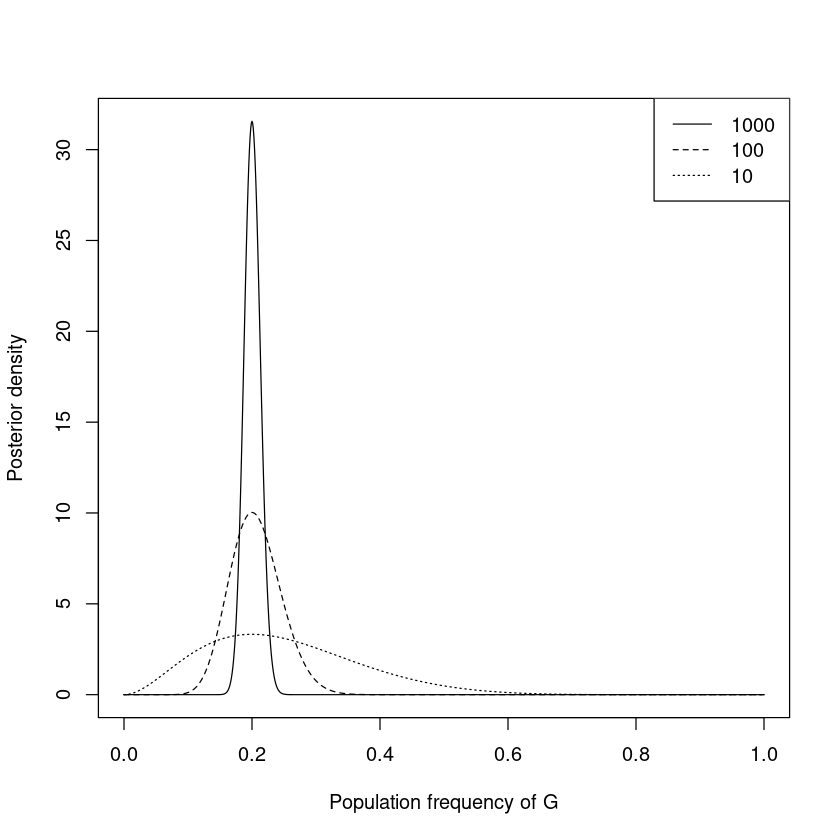

In [1]:
# Beta-Binomial model of population allele frequencies
p <- seq(0, 1, 0.001)

# 1000 chromosomes (200 G alleles)
k <- 200
n <- 1000
alpha <- k+1
beta <- n-k+1
plot(x=p, y=dbeta(p, shape1=alpha, shape2=beta), ylab="Posterior density" , xlab="Population frequency of G", type="l")

# 100 chromosomes (20 G alleles)
k <- 20
n <- 100
alpha <- k+1
beta <- n-k+1
points(x=p, y=dbeta(p, shape1=alpha, shape2=beta), type="l", lty=2)

# 10 chromosomes (2 G alleles)
k <- 2
n <- 10
alpha <- k+1
beta <- n-k+1
points(x=p, y=dbeta(p, shape1=alpha, shape2=beta), type="l", lty=3)

legend("topright", legend=c(1e3,1e2,1e1), lty=1:3)

When many data points are available, $P(\theta|y)$ will be approximately distributed as a Normal distribution.
This is given by the _Bayesian Central Limit Theorem_.

For large data points $n$ the posterior can be approximated by a Normal distribution with mean equal to the posterior mode and (co)variance (matrix) equal to minus the inverse of the second derivative matrix of the log posterior evaluated at the mode.

The Normal approximation follows the procedure:
* take the log
* take the derivative of $l(\theta)$ and set it to zero
* take the second derivative evaluated at $\hat{\theta}$
* take the minus inverse

In the Beta-Binomial model for population allele frequencies with flat Beta prior, $P(\theta|x) \propto \theta^x(1-\theta)^{n-x}$.
Remember that the derivative of $log(x)$ is $1/x$ and that the derivative of $log(1-x)$ is $1/(x-1)$.

* take the log: $l(\theta)=x\log\theta+(n-x)\log(1-\theta)$,
* take the derivative of $l(\theta)$ and set it to zero, obtaining $\hat{\theta}=\frac{x}{n}$,
* take the second derivative evaluated at $\hat{\theta}$, $-\frac{n}{\hat{\theta}}-\frac{n}{1-\hat{\theta}}$,
* take the minus inverse, $\frac{\hat{\theta}(1-\hat{\theta})}{n}$,
* $P(\theta|x) \sim N(\hat{\theta}, \frac{\hat{\theta}(1-\hat{\theta})}{n})$.


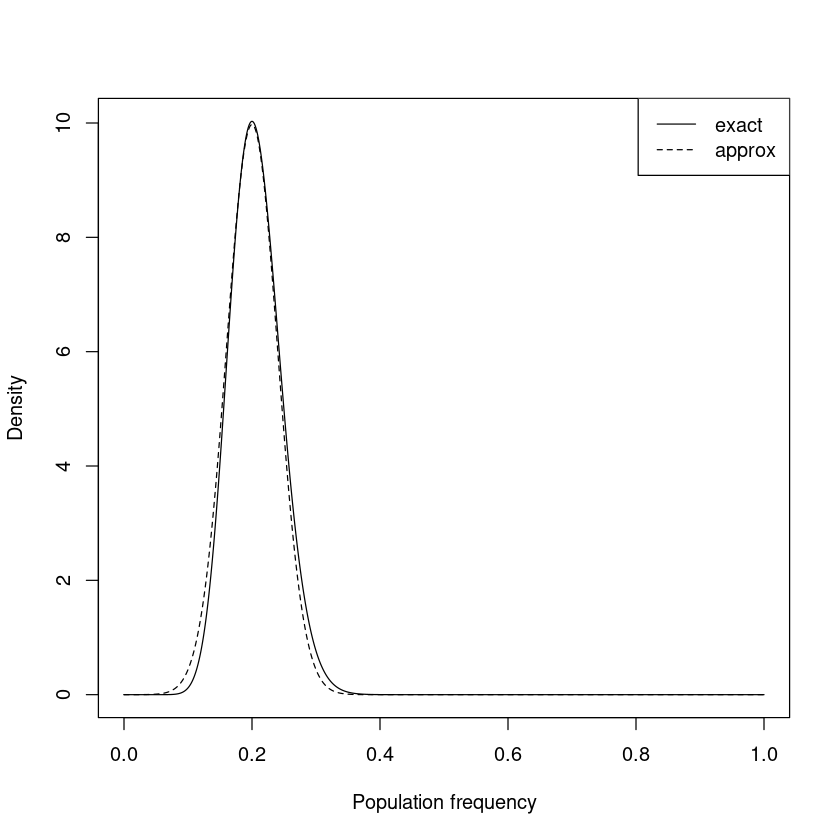

In [5]:
# Beta-Binomial model of population allele frequencies
p <- seq(0, 1, 0.001)

# 100 chromosomes (20 G alleles)  
k <- 20
n <- 100

# exact posterior with flat prior
alpha <- k+1
beta <- n-k+1
plot(x=p, y=dbeta(p, shape1=alpha, shape2=beta), ylab="Density", xlab="Population frequency", type="l")

# Normal approximation
thetaHat <- k/n
var <- thetaHat*(1-thetaHat)/n
points(x=p, y=dnorm(p, mean=thetaHat, sd=sqrt(var)), type="l", lty=2)

legend("topright", c("exact","approx"), lty=1:2)

You can see how the modes are very similar but the approximated curve fails to capture the asymmetry of the tails.

If the prior is flat, then we can replace the posterior mean by the MLE.
Alternatively, we can replace the posterior mode by the posterior mean.
These approximations are called _model approximations_ or _first order approximations_ as they estimate $\theta$ by the mode and the error goes to $0$ at a rate proportional to $1/n$.

Estimates of posterior moments and quantiles can be obtained simply as the corresponding features of the approximated Normal density.
However, the estimates of moments and quantiles may be poor if the posterior differs from normality.
_Laplace's Method_ provides a second order approximation to the posterior mean, with an error that decreases at a rate $1/n^2$.

In [6]:
options(signif=2)

# data
k <- 20
n <- 100

# exact posterior with flat prior
alpha <- k+1
beta <- n-k+1
exact <- rbeta(1e5, shape1=alpha, shape2=beta)
signif(quantile(exact),3)

# Normal approximation
thetaHat <- k/n
var <- thetaHat*(1-thetaHat)/n
approx <- rnorm(1e5, mean=thetaHat, sd=sqrt(var))
signif(quantile(approx),3)

0%    25%    50%    75%   100% 
0.0726 0.1780 0.2040 0.2320 0.4050

0%     25%     50%     75%    100% 
0.00921 0.17300 0.20000 0.22700 0.38200

The advantages of asymptotic methods are:
* they replace numerical integration with numerical differentiation,
* they are deterministic (without elements of stochasticity),
* they reduce the computational complexity for any study of robustness (how sensitive are our conclusions to changes in the prior/likelihood?).

Asymptotic methods have also disadvantages:

* they require that the posterior is unimodal,
* they require that the size of the data is large (how large is "large enough"?),
* for high-dimensional parameters the calculation of Hessian matrices (second derivatives) is hard.

### Non-iterative Monte Carlo methods

Direct sampling of the posterior density can be done using a Monte Carlo integration.

Suppose that ${\theta} \sim h({\theta})$ with $h({\theta})$ being a posterior distribution.

We wish to estimate $\gamma$, the posterior mean of $c({\theta})$, with $\gamma \equiv \mathrm{E}[c({\theta})]$.

Note that $\mathrm{E}[c({\theta})] = \int c({\theta}) h({\theta}) d{\theta}$.

If ${\theta}_1, {\theta}_2, ..., {\theta}_N$ are independent and identically distributed (iid) as $h({\theta})$, then
\begin{equation}
    \hat{\gamma}=\frac{1}{N}\sum_{i=1}^N c(\theta_i)
\end{equation}
which converges to $\mathrm{E}[c({\theta})]$ with probability 1 as $N \rightarrow \infty$.

The computation of posterior expectations requires only a sample of size $N$ from the posterior distribution.

In contrast to asymptotic methods, accuracy improves with $N$ the Monte Carlo sample size (which we can choose and have control upon) rather than $n$ the size of the data set (which can may not be able to control).

With higher dimensionality of ${\theta}$, more samples are needed but the structure remains the same.

The variance of $\hat{\gamma}$ can be estimated from the sample variance of the $c({\theta}_i)$ values.

The standard error estimate for $\hat{\gamma}$ is
\begin{equation}
    \hat{se}(\hat{\gamma}) = \sqrt[]{ \frac{1}{N(N-1)} \sum_{i=1}^N [c({\theta_i})-\hat{\gamma}]^2 }
\end{equation}

The Central Limit Theorem implies that $\hat{\gamma} \pm 2 \hat{se}(\hat{\gamma})$ provides the approximated $95\%$ confidence interval.
$N$ can be chosen as large as necessary to provide a desirable confidence interval.

In the univariate case, a histogram of the sampled $\theta_i$ estimates the posterior itself, as the probability of each bin converges to the true bin probability.

In fact, an estimate of $p \equiv P\{a<c(\theta)<b\}$ is given by
\begin{equation}
    \hat{p} = \frac{\text{number of } c(\theta_i) \in (a,b)}{N}
\end{equation}

We can use a kernel density function to smooth the histogram, using a Normal or rectangular distribution.
Given a sample from the posterior distribution, almost any quantity can be estimated.

What happens if we can't directly sample from this distribution?

There are methods for _indirect_ sampling of the posterior distribution.
The most commonly used ones are
1. importance sampling
2. rejection sampling
3. weighted bootstrap.

In the importance sampling, an importance function is derived to approximate the Normalised likelihood times the prior, and a weight function is then used for sampling.

In the weighted bootstrap, instead of resampling from the set $\{\theta_1,...,\theta_N\}$ with equal probabilities, some points are sampled more often than others because of unequal weighting.

In __rejection sampling__ a smooth density, called the _envelope function_ , is used to "cover" rather than approximate the posterior distribution.

Suppose we can identify an _envelope function_ $g({\theta})$ and a constant $M>0$ such that $L({\theta})\pi({\theta})<Mg({\theta})$ for all ${\theta}$.
Then the algorithm, in the univariate case, is the following:
* generate $\theta_i \sim g(\theta)$,
* generate $U \sim Uniform(0,1)$,
* if $MUg(\theta_i)<L(\theta_i)\pi(\theta_i)$ accept $\theta_i$ otherwise reject $\theta_i$,
* repeat this procedure until $N$ samples are obtained.

The members of this sample will be random variables from $h(\theta)$.

The intuition for the rejection sampling algorithm is that it is typically hard to sample from the true posterior but it is much easier to sample from the envelope function.

![](Images/Rejection.png)

__ACTIVITY__ 

Implement a rejection algorithm to approximate an unknown posterior distribution using a uniform envelope function.
From `Data/functions.R` load the function `L_times_pi()` which returns $L(.)\pi(.)$ with $\theta=[0,1]$.

Assess the accuracy of your approximation assuming that the true posterior is a Beta distribution $B(3,10)$.

_What happens if you change $M$ to very low or very high values?_

In [ ]:
source("Data/functions.R")
# function `L_times_pi(x)` will return L(x)*pi(x)

# parameter space
theta <- seq(0,1,0.01)

# g is a uniform envelope function

# M is a constant value
M <- 25000

# initialise vector that contains accepted values
thetas <- c()

# we want N samples
N <- 1e4

#while (length(thetas) < N) {

    # ...
    
    # ...

    # if 

#}

# plot

In [ ]:
## check approximation with a qq-plot
truePosterior <- rbeta(N, 3, 10)
#qqplot(...)
#abline(...)

### Markov chain Monte Carlo methods

* All previous methods are non-iterative as they draw a sample of fixed size $N$. There is no notion of "convergence" in these methods but rather we require $N$ to be sufficiently large.

* For many problems with high dimensionality it may be difficult to find an importance sampling density that, for instance, is acceptable to approximate the (log) posterior distribution.

_Markov chain Monte Carlo_ (MCMC) methods sequentially sample parameter values from a Markov chain whose stationary distribution is the desired posterior distribution.

A __Markov process__ is a mathematical object following a stochastic (random) process, usually defined as a collection of random variables.

A Markov process has the property that __the next value of the process depends only on the current value__, and it is independent from the previous ones. The future value will depend only on the current state.

A Markov chain is a Markov process that has a particular type of state space, which dictates the possible values that a stochastic process can take.

<img src="Images/Markov.png" width="300" height="300" />

A two-state Markov process, with the states E and A. Each number represents the probability of the Markov process changing from one state to another one, with the direction given by the arrow.

The _stationary distribution_ is the probability distribution to which the process converges for large values of steps, or iterations.

The great increase of generality of MCMC methods comes at the price of requiring an assessment of _convergence_ of the Markov chain to its stationary distribution.
Convergence is usually assessed using plots or numerical summaries of the sampled distribution from the chain.

The majority of Bayesian MCMC computation is based on two algorithms:
1. _Gibbs sampler_
2. _Metropolis-Hastings_ (M-H)


Suppose that our model has $k$ parameters so that $\vec{\theta}=(\theta_1, \theta_2, ..., \theta_k)$.
We also assume that we can sample from the full conditional distributions.

The collection of full conditional distributions uniquely determines the joint posterior distribution $P(\vec{\theta},{y})$ and all marginal posterior distributions $P(\theta_i,{y})$, for $i=1,...,k$.

Given an arbitrary set of starting values $\{\theta_2^{(0)}, ..., \theta_2^{(k)}\}$,
for $(t=1, ..., T)$, the _Gibbs sampler_ algorithm:
* draws $\theta_1^{(t)}$ from $P(\theta_1 | \theta_2^{(t-1)}, \theta_3^{(t-1)}, ..., \theta_k^{(t-1)}, y )$
* draws $\theta_2^{(t)}$ from $P(\theta_2 | \theta_1^{(t)}, \theta_3^{(t-1)}, ..., \theta_k^{(t-1)}, y )$
* ...
* draws $\theta_k^{(t)}$ from $P(\theta_k | \theta_1^{(t)}, \theta_2^{(t)}, ..., \theta_{k-1}^{(t)}, y )$

$(\theta_1^{(t)}, \theta_2^{(t)}, ..., \theta_k^{(t)})$ converges to a draw from the true joint posterior distribution $P(\theta_1, \theta_2, ..., \theta_k | y)$.

For sufficiently large $t>t_0$ then $\{\theta^{(t)}, t=t_0+1, ..., T\}$ is a correlated sample from the true posterior distribution.

A histogram of $\{\theta_i^{(t)}, t=t_0+1, ..., T\}$ provides an estimate of the marginal posterior distribution for $\theta_i$.

The posterior mean can be estimated as
\begin{equation}
    \hat{\mathrm{E}}(\theta_i|y) = \frac{1}{T-t_0} \sum_{t=t_0+1}^T \theta_i^{(t)}
\end{equation}
The time $0<=t<=t_0$ is called the _burn-in period_.

If we run $m$ parallele chains (typically $m \leq 5$), the posterior mean is
\begin{equation}
    \hat{\mathrm{E}}(\theta_i|y) = \frac{1}{m(T-t_0)} \sum_{j=1}^m \sum_{t=t_0+1}^T \theta_{i,j}^{(t)}
\end{equation}

The entire marginal posterior density of $\theta_i$ is
\begin{equation}
    \hat{\mathrm{E}}(\theta_i|y) \approx \frac{1}{m(T-t_0)} \sum_{j=1}^m \sum_{t=t_0+1}^T P(\theta_{i} | \theta_{l \neq i,j}^{(t)}, y) 
\end{equation}

 * A requirement for convergence is that the parameter space must be fully connected, without "holes".

Imagine a joint posterior distribution for two univariate parameters $\theta$ and $\nu$ with two disconnected regions of support.
The posterior is either defined for $(\theta>0 \text{ and } \nu>0$ or for $(\theta<0 \text{ and } \nu<0$.
If we choose $\theta^{(0)}>0$ then we will have $\mu^{(1)}>0$ and subsequentially $\theta^{(1)}>0$ and so on.
The chain will not be able to "escape" the first quadrant.

* When two univariate parameters $\theta$ and $\nu$ are highly correlated, the chain will have a "slow mixing" and might get trapped in one part of the joint distribution. _Thinning_ retains values only every $m^{th}$ iterations.

If $m$ is large enough, then the samples will be uncorrelated.

* To ensure that all the full conditional distributions are available, the prior distribution of each parameter should be chosen to be conjugate to the corresponding likelihood.

When the priors and likelihoods are not conjugate pairs, one of more of these conditional probabilities may not be available in closed form (i.e. we have an analytical solution).

Nevertheless, the full conditional probabilities will be available up to a proportionality constant.

The _Metropolis_ algorithm is a rejection algorithm which requires a function proportional to the distribution to be sampled, at the cost of a rejection step from a candidate density function.

It generates samples from a joint posterior distribution $h(\vec{\theta})$ such as $P(\vec{\theta}|y) \propto h(\vec{\theta}) \equiv f(y|\vec{\theta})\pi(\vec{\theta})$.


Given 
* a _candidate_ , or _proposal_ , symmetric density $q({\theta}^* | {\theta}^{(t-1)})$ which satisfies $q({\theta}^* | {\theta}^{(t-1)})=q({\theta}^{(t-1)} | {\theta}^*)$,
* a starting value ${\theta^{(0)}}$ at iteration $t=0$,

for $(t=1,..., T)$ the algorithm repeats:
* draw ${\theta}^* = q( \cdot | {\theta}^{(t-1)})$,
* calculate $r=h({\theta}^*)/h({\theta}^{(t-1)})$,
* if $r \geq 1$, set ${\theta}^{(t)}={\theta}^*$, otherwise
    * set ${\theta}^{(t)}={\theta}^*$ with probability $r$ or
    * set ${\theta}^{(t)}={\theta}^{(t-1)}$ with probability $1-r$.

${\theta}^{(t)}$ converges in distribution to a draw from the true posterior density $p(\vec{\theta}|y)$.

The Metropolis algorithm is flexible in the selection of the candidate density $q$ but may be less efficient than the Gibbs sampler when not properly tuned.

A typical candidate density is
\begin{equation}
    q({\theta}^*| {\theta}^{(t-1)}) = N({\theta}^*|{\theta}^{(t-1)}, \tilde{\Sigma})
\end{equation}

This distribution is symmetric and is "self-correcting" as candidates are always centered around the current value of the chain ( _random walk Metropolis_ ).

The posterior variance is represented by $\tilde{\Sigma}$ which can be empirically estimated from a preliminary run.

A skewed $q$ density will increase the acceptance rate but also generate more autocorrelated samples and, therefore. it may explore only a small proportion of the parameter space.
A rule of thumb is to choose $\tilde{\Sigma}$ so that around $50\%$ of the candidates are accepted.

However, often the choice of $\tilde{\Sigma}$ is done _adaptively_. One can keep track of the proportion of accepted candidates and tune $\tilde{\Sigma}$ accordingly. This is usually done during the burn-in period and it is called _pilot adaptation_.

In the _Metropolis-Hastings_ algorithm 
If $q({\theta}^*|{\theta}^{(t-1)}) \neq q({\theta}^{(t-1)}|{\theta}^*)$, the _Metropolis-Hastings_ algorithm replaces the acceptance rate $r$ by
\begin{equation}
    r = \frac{ h({\theta}^*) q({\theta}^{(t-1)}|{\theta}^*) }{ h({\theta}^{(t-1)})  q({\theta}^*|{\theta}^{(t-1)})  }
\end{equation}

This generalisation of the Metropolis algorithm drops the requirement that the candidate density must be symmetric.
For instance, for bounded parameter spaces (e.g. $\theta>0$) a Gaussian density is not appropriate.

If $q({\theta}^*|{\theta}^{(t-1)})=q({\theta}^*)$, the proposal ignores the current value of the variable.

In _Hastings independence chain_ , the acceptance rate is
\begin{equation}
    r = \frac{h({\theta}^*)/q({\theta}^*)}{h({\theta}^{(t-1)})/q({\theta}^{(t-1)})}
\end{equation}
which is the weight function in the importance sampling.

* _Langevin-Hastings_ algorithm introduces a systematic drift in the candidate density.
* _Slice sampler_ algorithm uses auxiliary variables to expand the parameter space.
* _Hybrid_ forms combined multiple algorithm in a single problem.
* _Adaptive_ algorithms use the early output from a chain to refine the sampling as it progresses.

##### Convergence

Convergence is an important issue for MCMC algorithms as their output is random and autocorrelated.

When the output is safely thought to come from a true stationary distribution of the Markov chain for all $t>T$ then the MCMC algorithm has converged at time $T$.

There are both theoretical basis and diagnostic tools to assess whether the chain has indeed reached convergence.

A diagnostic strategy is to:
* run parallel chains with starting points drawn from an overdispersed distribution with respect to the stationary distribution;
* visually inspect these chains;
<img src="Images/Chains.png" width="400" height="400" />

* for each graph calculate the scale reduction factor (to check whether the variation within chains are approximately equal to the total variation);
* investigate crosscorrelations among parameters.
<img src="Images/Chains.png" width="400" height="400" />

##### Software

There are several software that implement MCMC algorithms for generating samples from posterior distributions.

A commonly used program is OpenBUGS, which is the free and open-source version of WinBUGS.
The BRugs package in R calls WinBUGS.

JAGS and its R interface rjags are also valid alternatives.
An example to use rjags can be found [here](https://nbviewer.jupyter.org/github/mhasoba/TheMulQuaBio/blob/master/notebooks/Appendix-ModelFitting.ipynb).

In python, [pymc3](https://docs.pymc.io/notebooks/getting_started.html) is a good resource for MCMC sampling.

### Intended Learning Outcomes

At the end of this part you are now able to:
* describe the use of asymptotic methods,
* illustrate the utility of direct and indirect sampling methods,
* evaluate the feasibility of Markov Chain Monte Carlo sampling,
* implement simple indirect sampling methods.